In [ ]:
from qiskit import *

In [ ]:
qr = QuantumRegister(3,"qubit")
cr = ClassicalRegister(3,"bits")
qc = QuantumCircuit(qr,cr)

qc.draw()

In [3]:
stvBackend = Aer.get_backend('statevector_simulator')

myJob = execute (qc, stvBackend)

# Get results as state vector

ampls = myJob.result().get_statevector()

for amplitude in ampls:
    print(f'{amplitude:.2f}')

1.00+0.00j
0.00+0.00j
0.00+0.00j
0.00+0.00j
0.00+0.00j
0.00+0.00j
0.00+0.00j
0.00+0.00j


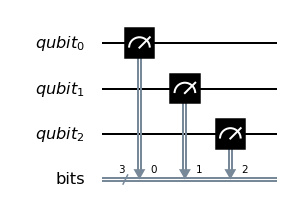

In [4]:
qc.measure(qr,cr)
qc.draw()

In [6]:
emulator = Aer.get_backend('qasm_simulator')
job = execute( qc, emulator, shots=1000 ) 

# The result is a histogram in the form of a dictionary.

histogram = job.result().get_counts()
print ('results: \n') 
print(histogram, "\n")

for x, y in histogram.items():
  print(int(x,2),":", y)

results: 

{'000': 1000} 

0 : 1000


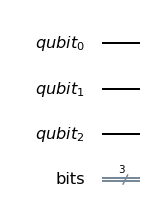

In [7]:
qc2 = QuantumCircuit(qr,cr)
qc2.draw()

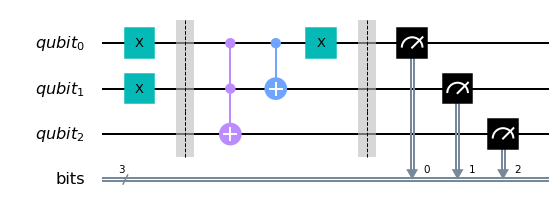

In [8]:
# input state

qc2.x(qr[0])
qc2.x(qr[1])

qc2.barrier()

# add 1
qc2.mct(qr[0:2],qr[2])
qc2.mct(qr[0:1],qr[1])
qc2.x(qr[0])

# measure

qc2.barrier()

qc2.measure(qr,cr)

qc2.draw()

In [9]:
job = execute( qc2, emulator, shots=1000 ) 

# The result is a histogram in the form of a dictionary.

histogram = job.result().get_counts()
print ('results: \n') 
print(histogram, "\n")

for x, y in histogram.items():
  print(int(x,2),":", y)

results: 

{'100': 1000} 

4 : 1000


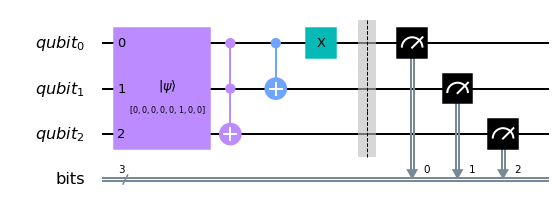

In [13]:
vector = [0,0,0,0,0,1,0,0]  # 5 => 0*|000>+0*|001>+ ... + 1*|101>+0*|110>+...+0*|111>

# |4> = |100>
# |5> = |101>
# |6> = |110>
# |7> = |111>

qc3 = QuantumCircuit(qr,cr)

qc3.initialize(vector, [qr[0],qr[1],qr[2]])


# add 1

qc3.mct(qr[0:2],qr[2])
qc3.mct(qr[0:1],qr[1])
qc3.x(qr[0])

# measure

qc3.barrier()

qc3.measure(qr,cr)

qc3.draw()

In [14]:
job = execute( qc3, emulator, shots=100 ) 

# The result is a histogram in the form of a dictionary.

histogram = job.result().get_counts()
print ('results: \n') 
print(histogram, "\n")

for x, y in histogram.items():
  print(int(x,2),":", y)

results: 

{'110': 100} 

6 : 100


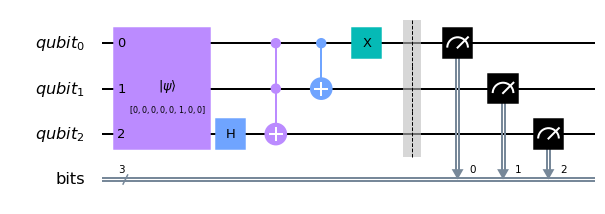

In [15]:
vector = [0,0,0,0,0,1,0,0]  # 5 => 0*|000>+0*|001>+ ... + 1*|101>+0*|110>+...+0*|111>

qc4 = QuantumCircuit(qr,cr)

qc4.initialize(vector, [qr[0],qr[1],qr[2]])

qc4.h(qr[2])

# add 1

qc4.mct(qr[0:2],qr[2])
qc4.mct(qr[0:1],qr[1])
qc4.x(qr[0])

# measure

qc4.barrier()

qc4.measure(qr,cr)

qc4.draw()

In [17]:
job = execute( qc4, emulator, shots=100 ) 

# The result is a histogram in the form of a dictionary.

histogram = job.result().get_counts()
print ('results: \n') 
print(histogram, "\n")

for x, y in histogram.items():
  print(int(x,2),":", y)

results: 

{'010': 52, '110': 48} 

2 : 52
6 : 48


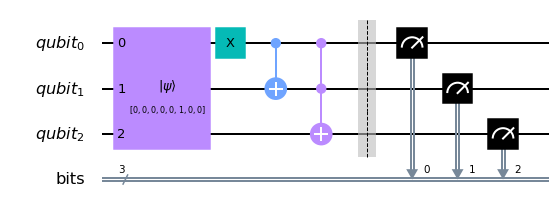

In [18]:
vector = [0,0,0,0,0,1,0,0]  # 5 => 0*|000>+0*|001>+ ... + 1*|101>+0*|110>+...+0*|111>

qc4 = QuantumCircuit(qr,cr)

qc4.initialize(vector, [qr[0],qr[1],qr[2]])

# substract 1
qc4.x(qr[0])
qc4.mct(qr[0:1],qr[1])
qc4.mct(qr[0:2],qr[2])

# measure

qc4.barrier()

qc4.measure(qr,cr)

qc4.draw()

In [19]:
job = execute( qc4, emulator, shots=100 ) 

# The result is a histogram in the form of a dictionary.

histogram = job.result().get_counts()
print ('results: \n') 
print(histogram, "\n")

for x, y in histogram.items():
  print(int(x,2),":", y)

results: 

{'100': 100} 

4 : 100
